# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [112]:
#Importing libraries 
import requests
import os
import tweepy 
import json
import time
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
# Importing the twitter archive  to a dataframe
df_weratedogs = pd.read_csv('twitter-archive-enhanced.csv')
df_weratedogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Using the os library to create a folder
folder_name = 'tweet_image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    

In [4]:
# Using requests library to download the image predictions file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)

In [8]:
# Converting the image predictions file to a dataframe
df_image = pd.read_csv('tweet_image_predictions\image-predictions.tsv', sep='\t')

In [9]:
# Displaying the dataframe
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [10]:
# Declaring Twitter accesss tokens and API Keys
consumer_key = 'YOUR CONSUMER KEY HERE'
consumer_secret = 'YOUR CONSUMER KEY HERE'
access_token = 'YOUR CONSUMER KEY HERE'
access_secret = 'YOUR CONSUMER KEY HERE'

In [16]:

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_secret)

In [21]:
api = tweepy.API(auth,wait_on_rate_limit=True)

In [29]:
# Using the tweet IDs in twitter archive to query the Twitter API for each tweets JSON data
start =time.time()

with open('getstatus_error.txt','w') as errfile:
    valid_ids = 0
    err_ids = 0
    tweet_ids = df_weratedogs.tweet_id
    with open('tweet_json.txt','w',encoding='utf-8') as outfile:
        for i, tweet_id in tweet_ids.iteritems():
            try:
                print("%s# %s" % (str(i+1),tweet_id))

                tweet = api.get_status(tweet_id, tweet_mode='extended')
                json_content = tweet._json

                json.dump(json_content,outfile)
                outfile.write('\n')
                valid_ids +=1
            except tweepy.errors.TweepyException as e:
                err_ids += 1
                err_str = []
                err_str.append(str(tweet_id))
                err_str.append(': ')
                err_str.append(e.response.json()['errors'][0]['message'])
                err_str.append('\n')
                errfile.write(''.join(err_str))
                print(''.join(err_str))
                continue
            print("%s %s" % ('Valid tweets:',valid_ids))
            print("%s %s" % ('Error tweets:',err_ids))
end = time.time()
print((end - start)/(1000*60))



                


1# 892420643555336193
892420643555336193: Bad Authentication data.

2# 892177421306343426
892177421306343426: Bad Authentication data.

3# 891815181378084864
891815181378084864: Bad Authentication data.

4# 891689557279858688
891689557279858688: Bad Authentication data.

5# 891327558926688256
891327558926688256: Bad Authentication data.

6# 891087950875897856
891087950875897856: Bad Authentication data.

7# 890971913173991426
890971913173991426: Bad Authentication data.

8# 890729181411237888
890729181411237888: Bad Authentication data.

9# 890609185150312448
890609185150312448: Bad Authentication data.

10# 890240255349198849
890240255349198849: Bad Authentication data.

11# 890006608113172480
890006608113172480: Bad Authentication data.

12# 889880896479866881
889880896479866881: Bad Authentication data.

13# 889665388333682689
889665388333682689: Bad Authentication data.

14# 889638837579907072
889638837579907072: Bad Authentication data.

15# 889531135344209921
889531135344209921: 

In [35]:

df_list=[]
with open ('tweet-json.txt','r') as json_file:
    for line in json_file:
        status = json.loads(line)

        df_list.append({
            'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                        'display_text_range': status['display_text_range']
        })

df_status = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])

In [36]:
df_status.head()

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,8853,39467,"[0, 85]"
1,892177421306343426,6514,33819,"[0, 138]"
2,891815181378084864,4328,25461,"[0, 121]"
3,891689557279858688,8964,42908,"[0, 79]"
4,891327558926688256,9774,41048,"[0, 138]"


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [38]:
df_weratedogs.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1046,743545585370791937,NaN,NaN,2016-06-16 20:47:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bentley and Millie. They do every...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743545585...,11,10,Bentley,None,None,None,None
1304,707411934438625280,NaN,NaN,2016-03-09 03:45:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""I shall trip the big pupper with leash. Big p...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/707411934...,11,10,None,None,None,pupper,None
1245,711732680602345472,NaN,NaN,2016-03-21 01:54:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I want to hear the joke this dog was just told...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711732680...,10,10,None,None,None,None,None
65,879492040517615616,NaN,NaN,2017-06-27 00:10:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. He thinks you should measure e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879492040...,12,10,Bailey,None,None,None,None
2272,667491009379606528,NaN,NaN,2015-11-19 23:53:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Two dogs in this one. Both are rare Jujitsu Py...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667491009...,7,10,None,None,None,None,None


### Twitter Archive (df_weratedogs) has the following columns
tweet_id: this is a unique identifier for each tweet.

in_reply_to_status_id: This column contains the integer representation of the original tweet's id, if the represented tweet is a reply.

in_reply_user_id: This column contains the integer representation of the original tweet's  author id, if the represented tweet is a reply.

timestamp: This column shows the time when the tweet was created.

source: Ths column shows the utility that was used to post the tweet e.g Twitter for Web.

text: This column is for the actual text of the tweet.

retweeted_status_id: This column shows the integer representation of the of the original tweet's id if the represented tweet is a retweet.

retweeted_status_user_id: This column shows the integer representation of the of the original tweet's author id if the represented tweet is a retweet.

retweeted_status_timestamp: This column shows the time the tweet was created.

expanded_urls: This column shows tweet URL

rating_numerator: This column shows the numerator value of the dog's rating.

rating_denominator: This column shows the denominator value of the dog's rating.

name: This column shows the name of the dog.

doggo: This column show one of the four dog stage.

floofer: This column show one of the four dog stage.

pupper: This column show one of the four dog stage.

puppo: This column show one of the four dog stage.



In [39]:
df_weratedogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [40]:
# Checking if any of the entries in df_weratedogs are retweets
len(df_weratedogs[df_weratedogs.retweeted_status_id.isnull() == False])

181

In [41]:
# Checking if there are any entries in df_weratedogs whose corresponding entries with same tweet_id is missing in df_image
len(df_weratedogs[~df_weratedogs.tweet_id.isin(df_image.tweet_id)])

281

In [42]:
#Sorting using the rating_denominator values
df_weratedogs.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [43]:
#Sorting the names and the number of times they appear
df_weratedogs.name.value_counts().sort_index(ascending=False)

very            5
unacceptable    1
this            1
the             8
such            1
               ..
Aiden           1
Adele           1
Acro            1
Ace             1
Abby            2
Name: name, Length: 957, dtype: int64

In [44]:
# Number of records whose both doggo and floofer columns are not None
len(df_weratedogs[(df_weratedogs.doggo != 'None') & (df_weratedogs.floofer != 'None')])

1

In [45]:
# Number of records whose both doggo and pupper columns are not None
len(df_weratedogs[(df_weratedogs.doggo != 'None') & (df_weratedogs.pupper != 'None')])

12

In [46]:
# Number of records whose both doggo and pupper columns are not None
len(df_weratedogs[(df_weratedogs.doggo != 'None') & (df_weratedogs.puppo != 'None')])

1

In [47]:
# Number of records whose both floofer and pupper columns are not None
len(df_weratedogs[(df_weratedogs.floofer != 'None') & (df_weratedogs.pupper != 'None')])

0

In [48]:
# Number of records whose both floofer and puppo columns are not None
len(df_weratedogs[(df_weratedogs.floofer != 'None') & (df_weratedogs.puppo != 'None')])

0

In [49]:
# Number of records whose both pupper and puppo columns are not None
len(df_weratedogs[(df_weratedogs.pupper != 'None') & (df_weratedogs.puppo != 'None')])

0

In [50]:
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1466,778650543019483137,https://pbs.twimg.com/media/Cs5ShihWEAAH2ti.jpg,1,German_shepherd,0.515699,True,malinois,0.300292,True,kelpie,0.087022,True
1386,766069199026450432,https://pbs.twimg.com/media/CqGf3xaXYAEh3ak.jpg,1,redbone,0.484855,True,beagle,0.437527,True,basset,0.010585,True
1370,762035686371364864,https://pbs.twimg.com/ext_tw_video_thumb/76203...,1,home_theater,0.063152,False,cash_machine,0.046692,False,theater_curtain,0.046277,False
1480,780858289093574656,https://pbs.twimg.com/media/CtYqeNHWgAATqYZ.jpg,1,Chesapeake_Bay_retriever,0.488555,True,Sussex_spaniel,0.271655,True,kelpie,0.106913,True
249,670679630144274432,https://pbs.twimg.com/media/CU67jGSUkAAk_1Y.jpg,1,Ibizan_hound,0.342734,True,Brittany_spaniel,0.229065,True,Chihuahua,0.104029,True


### Tweet image predictions (df_image) has the following columns
tweet_id:This column contains the unique id for each tweet.

jpg_url: This column contains the image URL for the dog.

img_num: This is the image number that matches the most confident prediction.

p1: This column contains the algorithm's #1 prediction for the image in the tweet.

p1_conf:This column shows how confident the algorithm is in its #1 prediction.

p1_dog: This column shows whether or not the #1 prediction is a breed of dog

p2: This column contains the algorithm's #2 prediction for the image in the tweet.

p2_conf: This column shows how confident the algorithm is in its #2 prediction

p2_dog: This column shows whether or not the #3 prediction is a breed of dog.

p3: This column contains the algorithm's #3 prediction for the image in the tweet.

p3_conf: This column shows how confident the algorithm is in its #3 prediction.

p3_dog: This column shows whether or not the #3 prediction is a breed of dog.

In [51]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [52]:
df_status.sample(5)

,tweet_id,retweet_count,favorite_count,display_text_range
822,769940425801170949,11131,34948,"[0, 100]"
584,800018252395122689,15351,31768,"[0, 53]"
1837,675891555769696257,976,2297,"[0, 139]"
1716,680176173301628928,1760,4263,"[0, 94]"
1110,733460102733135873,1451,4605,"[0, 95]"


### Tweet Status has the following columns

id: This column shows the unique identifier for each tweet

retweet_count: This column shows the number of times this Tweet has been retweeted

favorite_count: This column shows the approximate number of times this Tweet has been liked by Twitter users

display_text_range: This column shows an array of two unicode code point indices, identifying the inclusive start and exclusive end of the displayable content of the Tweet

In [53]:
df_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2354 non-null   int64 
 1   retweet_count       2354 non-null   int64 
 2   favorite_count      2354 non-null   int64 
 3   display_text_range  2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


### Quality issues
Twitter archive (df_weratedogs) has the followinf quality issues:

1. There are some entries with more than one dog stage.
2. There are unnecessary html tags in source column in place of utility name e.g. <a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>
3. There are dog names that do not begin with capital letters.
4. There are some records that have more than one dog stage
5. There are retweets which are duplicates.
6. There are many tweet_id values in this table that are missing in the df_image table.
7. The data types in timestamp, in_reply_to_status_id,and in_reply_to_user_id are incorrect.
8. The text column has untruncated text instead of displayable text.

### Tidiness issues
The following are tidiness issues found:

1. The doggo, floofer, pupper and puppo columns in df_weratedogs table should be merged into one column named "stage"

2. df_weratedogs without any duplicates (i.e. retweets) will have empty retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns, which can be dropped

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [54]:
# Make copies of original pieces of data
weratedogs_clean = df_weratedogs.copy()

### Issue #1: Quality

#### 1. Define: Many tweet_id(s) of df_weratedogs table are missing in df_image (image predictions) table.
##### Keep only those records in df_weratedogs table whose tweet_id exists in df_image table.

#### Code

In [57]:
weratedogs_clean = weratedogs_clean[weratedogs_clean.tweet_id.isin(df_image.tweet_id)]

#### Test

In [58]:
len(weratedogs_clean[~weratedogs_clean.tweet_id.isin(df_image.tweet_id)])

0

####  2. Define : There are unnecessary html tags in source column in place of utility name e.g. <a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>

#### Code

In [63]:
#Here we strip all html anchor tags (i.e. <a..></a>) in source column and retain just the text in between the tags. Convert the datatype from string to categorical.

weratedogs_clean.source = weratedogs_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

C:\Users\USER\AppData\Local\Temp\ipykernel_14948\2174026591.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  weratedogs_clean.source = weratedogs_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')


In [64]:
weratedogs_clean.source = weratedogs_clean.source.astype('category')

#### Test

In [65]:
weratedogs_clean.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

#### 3. Define : There are dog names that do not begin with capital letters.

#### Code

In [66]:
#Replace all lowercase values of name column with Non
weratedogs_clean['name'][weratedogs_clean['name'].str.match('[a-z]+')] = 'None'

C:\Users\USER\AppData\Local\Temp\ipykernel_14948\1792502329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weratedogs_clean['name'][weratedogs_clean['name'].str.match('[a-z]+')] = 'None'


#### Test

In [67]:
weratedogs_clean.name[weratedogs_clean.name == 'None'].value_counts()

None    644
Name: name, dtype: int64

In [68]:
# Sort ascending by name to check if there are more names starting with a lowercase alphabet
weratedogs_clean.name.value_counts().sort_index(ascending=False)

Zuzu     1
Zooey    1
Zoey     3
Zoe      1
Ziva     1
        ..
Aiden    1
Adele    1
Acro     1
Ace      1
Abby     2
Name: name, Length: 914, dtype: int64

### 4. Define : There are some records that have more than one dog stage

#### Code

In [72]:
print(len(weratedogs_clean[(weratedogs_clean.doggo != 'None') & (weratedogs_clean.floofer != 'None')]))
print(len(weratedogs_clean[(weratedogs_clean.doggo != 'None') & (weratedogs_clean.puppo != 'None')]))
print(len(weratedogs_clean[(weratedogs_clean.doggo != 'None') & (weratedogs_clean.pupper != 'None')]))

1
1
9


In [73]:
for i, row in weratedogs_clean[((weratedogs_clean.doggo != 'None') & (weratedogs_clean.floofer != 'None'))
                   | ((weratedogs_clean.doggo != 'None') & (weratedogs_clean.puppo != 'None'))].iterrows():
    print('%s %s\n'%(row.tweet_id, row.text))

855851453814013952 Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel

854010172552949760 At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk



#### Test

In [76]:
len(weratedogs_clean[((weratedogs_clean.doggo != 'None') & (weratedogs_clean.pupper != 'None'))
                  | ((weratedogs_clean.doggo != 'None') & (weratedogs_clean.floofer != 'None')) 
                  | ((weratedogs_clean.doggo != 'None') & (weratedogs_clean.puppo != 'None'))])

0

#### 5. Define : There are retweets which are duplicates.
##### Keep only those rows in df_weratedogs table that are original tweets and NOT retweets (i.e. retweeted_status_id column is null) and delete the rest.

#### Code

In [77]:
weratedogs_clean = weratedogs_clean[weratedogs_clean.retweeted_status_id.isnull()]

#### Test

In [78]:
len(weratedogs_clean[weratedogs_clean.retweeted_status_id.isnull() == False])

0

#### 6. Define : There are many tweet_id values in this table that are missing in the df_image table.

#### Code

In [79]:
#Keep only those records in df_weratedogs table whose tweet_id exists in df_image table

archive_clean = weratedogs_clean[weratedogs_clean.tweet_id.isin(df_image.tweet_id)]

#### Test

In [80]:
len(archive_clean[~archive_clean.tweet_id.isin(df_image.tweet_id)])

0

#### 7. Define : The data types in timestamp, in_reply_to_status_id,and in_reply_to_user_id are incorrect.

#### Code

In [81]:
weratedogs_clean.in_reply_to_status_id = weratedogs_clean.in_reply_to_status_id.fillna(0)
weratedogs_clean.in_reply_to_user_id = weratedogs_clean.in_reply_to_user_id.fillna(0)

weratedogs_clean.in_reply_to_status_id = weratedogs_clean.in_reply_to_status_id.astype(np.int64)
weratedogs_clean.in_reply_to_user_id = weratedogs_clean.in_reply_to_user_id.astype(np.int64)

weratedogs_clean.timestamp = pd.to_datetime(weratedogs_clean.timestamp)

#### Test

In [82]:
weratedogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1994 non-null   int64              
 1   in_reply_to_status_id       1994 non-null   int64              
 2   in_reply_to_user_id         1994 non-null   int64              
 3   timestamp                   1994 non-null   datetime64[ns, UTC]
 4   source                      1994 non-null   category           
 5   text                        1994 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1994 non-null   object             
 10  rating_numerator            1994 non-null   int64           

#### 8. Define : The text column has untruncated text instead of displayable text.

#### Code

In [83]:
# Using the display_text_range of status_df table, extract displayable text from text column

# Before extraction: untruncated text of first 3 records
print(weratedogs_clean.iloc[0].text)
print(weratedogs_clean.iloc[1].text)
print(weratedogs_clean.iloc[2].text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB


In [85]:
# merge status_df's display_text_range column to archive_clean to extract text using range values
archive_clean = pd.merge(weratedogs_clean, df_status[['tweet_id', 'display_text_range']], on='tweet_id')

In [95]:
# using display_text_range of archive_clean, extract displayable text
for i, row in archive_clean.iterrows():
    text_range = row.display_text_range
    display_text = row.text[text_range[0]:text_range[1]]
    weratedogs_clean.at[i,'text']=display_text

In [97]:
# drop display_text_range column
#weratedogs_clean.drop('display_text_range', axis=1, inplace=True)

#### Test

In [98]:
# After extraction: first 3 records now show displayable text
print(weratedogs_clean.iloc[0].text)
print(weratedogs_clean.iloc[1].text)
print(weratedogs_clean.iloc[2].text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10


### Issue #2: Tidiness

#### 1. Define : The doggo, floofer, pupper and puppo columns in arc_df table should be merged into one column named "stage"

#### Code

In [ ]:
weratedogs_clean.doggo.value_counts()

In [ ]:
weratedogs_clean.floofer.value_counts()

In [ ]:
weratedogs_clean.pupper.value_counts()

In [ ]:
weratedogs_clean.puppo.value_counts()

In [ ]:
# merge the doggo, floofer, pupper and puppo columns to a stage column
weratedogs_clean['stage'] = weratedogs_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [ ]:
# convert the datatype from string to categorical
weratedogs_clean.stage = weratedogs_clean.stage.astype('category')

In [ ]:
# drop the doggo, floofer, pupper and puppo columns
weratedogs_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [ ]:
weratedogs_clean.stage.value_counts()

In [ ]:
weratedogs_clean.info()

#### 2. Define : df_weratedogs without any duplicates (i.e. retweets) will have empty retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns, which can be dropped.

#### Code

In [ ]:
weratedogs_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [ ]:
weratedogs_clean.info()

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [99]:
weratedogs_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [100]:
df = weratedogs_clean.copy()

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2349 entries, 0 to 1940
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1994 non-null   float64            
 1   in_reply_to_status_id       1994 non-null   float64            
 2   in_reply_to_user_id         1994 non-null   float64            
 3   timestamp                   1994 non-null   datetime64[ns, UTC]
 4   source                      1994 non-null   category           
 5   text                        2349 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1994 non-null   object             
 10  rating_numerator            1994 non-null   float64         

#### 1. How many tweets have been posted by WeRateDogs over time?

In [102]:
df['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    296
2015-12    367
2016-01    169
2016-02    111
2016-03    120
2016-04     54
2016-05     57
2016-06     81
2016-07     88
2016-08     59
2016-09     63
2016-10     65
2016-11     53
2016-12     54
2017-01     66
2017-02     64
2017-03     48
2017-04     41
2017-05     43
2017-06     44
2017-07     49
2017-08      2
Name: timestamp, dtype: int64

#### 2.Which source is used to post on Twitter the most?

In [104]:
df['source'].value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

#### 3. What percentage of dogs are rated above 10?

In [105]:
df['rating_numerator'][df['rating_numerator'] > 10].value_counts().sum()

1161

### Insights:
1. The number of tweets posted by WeRateDogs has sharply declined over time from November 2015 to August 2017 

2. The source most used by WeRateDogs is from an iPhone, which takes up 98%. 

3. The percentage of dogs rated above 10 is 60% out of the total of 1994 dogs.

### Visualization

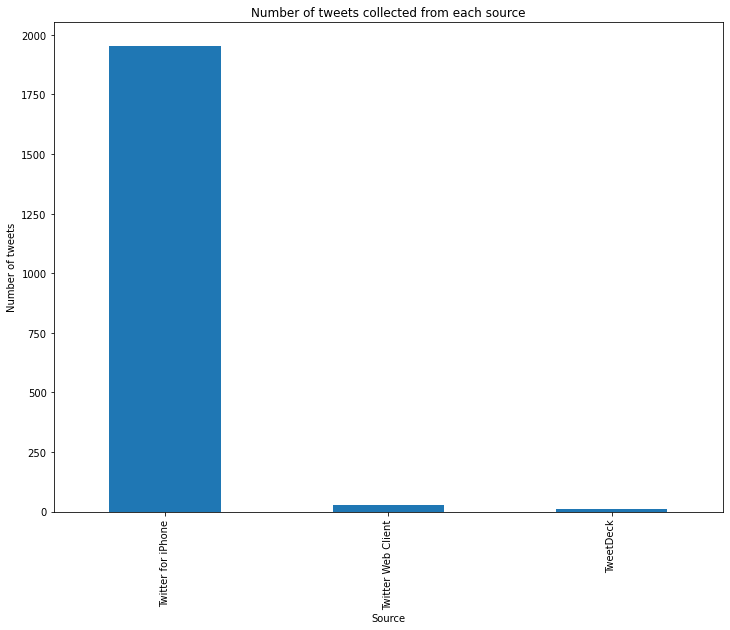

In [117]:
df.source.value_counts().plot(kind='bar', xlabel='Source', ylabel='Number of tweets', title="Number of tweets collected from each source");

In [119]:
plt.rcParams["figure.figsize"] = [12, 9]